## SUISIDE ANALYSIS

In [120]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import plotly.express as px

In [121]:
pwd = os.getcwd()

In [122]:
# importing Data

data_import = pd.read_csv(pwd + './Suicides in India 2001-2012.csv')
data_import.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [123]:
data_import.shape

(237519, 7)

there`s total 237519 rows of data lets analyse it

In [124]:
# Creating copy of data to begin With

data = data_import.copy()

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [126]:
data.duplicated().sum()

0

There No Null or duplicate Rows

In [127]:
data.sort_values(by= 'Total', ascending = False)

,State,Year,Type_code,Type,Gender,Age_group,Total
209783,Total (All India),2012,Social_Status,Married,Male,0-100+,63343
209757,Total (All India),2011,Social_Status,Married,Male,0-100+,62433
210099,Total (States),2012,Social_Status,Married,Male,0-100+,62123
209733,Total (All India),2010,Social_Status,Married,Male,0-100+,61453
210069,Total (States),2011,Social_Status,Married,Male,0-100+,61242
...,...,...,...,...,...,...,...
123546,Lakshadweep,2004,Causes,Other Prolonged Illness,Male,30-44,0
123547,Lakshadweep,2004,Causes,Death of Dear Person,Male,30-44,0
123548,Lakshadweep,2004,Causes,Family Problems,Male,30-44,0
123549,Lakshadweep,2004,Causes,Paralysis,Female,45-59,0


There Total In states lets see them

In [128]:
data['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

lets drop the rows in states having ['Total (All India)', 'Total (States)', 'Total (Uts)']

In [129]:
data = data.drop( index = data[(data.State == 'Total (All India)') | (data.State == 'Total (States)') | (data.State == 'Total (Uts)') ].index)
data['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [130]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


there`s also 0 as total means no suiside for that Lets Drop it

In [131]:
print("before droping : " , data.shape[0])
data = data.drop(index = data[data['Total']==0].index )
print("after droping : " , data.shape[0])

before droping :  236583
after droping :  101110


Lets look at what are the age groups

In [132]:
list(data.Age_group.unique())

['0-14', '15-29', '30-44', '45-59', '60+', '0-100+']

There a 0-100+ named age group which contain all unknown age groups lets see them 

In [133]:
data[data['Age_group'] == '0-100+']

,State,Year,Type_code,Type,Gender,Age_group,Total
261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
266,A & N Islands,2001,Education_Status,Primary,Female,0-100+,7
267,A & N Islands,2001,Education_Status,Matriculate/Secondary,Female,0-100+,6
268,A & N Islands,2001,Education_Status,Matriculate/Secondary,Male,0-100+,10
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


There are 8951 rows with 0-100 age group lets create different dataframe for it

In [134]:
age_grp_unkonwn = data[data['Age_group'] == '0-100+']
age_grp_unkonwn

,State,Year,Type_code,Type,Gender,Age_group,Total
261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
266,A & N Islands,2001,Education_Status,Primary,Female,0-100+,7
267,A & N Islands,2001,Education_Status,Matriculate/Secondary,Female,0-100+,6
268,A & N Islands,2001,Education_Status,Matriculate/Secondary,Male,0-100+,10
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


Remove Above from our original DataFrame

In [135]:
data = data.drop(index = age_grp_unkonwn.index)

* Lets see Average suiside rate in different age groups

In [136]:
age_grp = data.groupby(['Age_group'])['Total'].mean().reset_index(name = 'Average Suisides')
age_grp

,Age_group,Average Suisides
0,0-14,10.209565
1,15-29,61.459816
2,30-44,61.153549
3,45-59,44.864521
4,60+,25.201584


In [137]:
px.line(data_frame = age_grp, x = 'Age_group', y = 'Average Suisides', title = "Average Suisides for Different Age Groups")

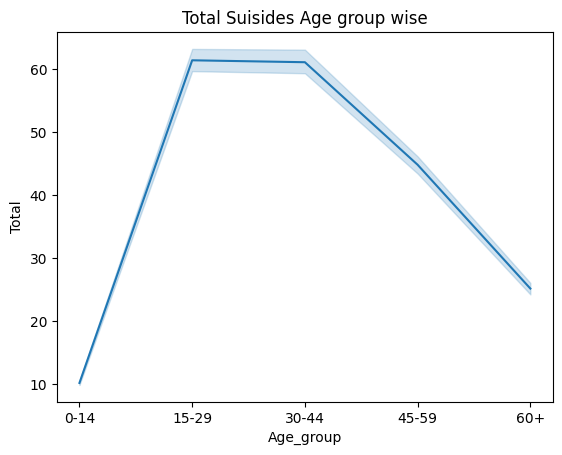

In [138]:
sns.lineplot(data = data, x = 'Age_group', y = 'Total')
plt.title("Total Suisides Age group wise")
plt.show()

**Observation :- There suisides rate are increasing among teenagers while after 40 theres decrease**

* Lets look at which are top 10 states With highest suisides

In [139]:
top10_suiside = data.groupby(['State'])['Total'].sum().reset_index(name = 'total_suiside').sort_values(by = 'total_suiside', ascending=False).head(10)
top10_suiside

,State,total_suiside
20,Maharashtra,541167
34,West Bengal,497962
30,Tamil Nadu,491065
1,Andhra Pradesh,488419
16,Karnataka,440895
17,Kerala,323074
19,Madhya Pradesh,270921
11,Gujarat,198504
6,Chhattisgarh,181364
25,Odisha,160338


In [140]:

px.bar(x = 'State', y='total_suiside',data_frame = top10_suiside,title="Top 10 States Suiside Wise")


**Observation :- Maharashtra is the state having most Suisides**

* Lets look at what are the suisides for years

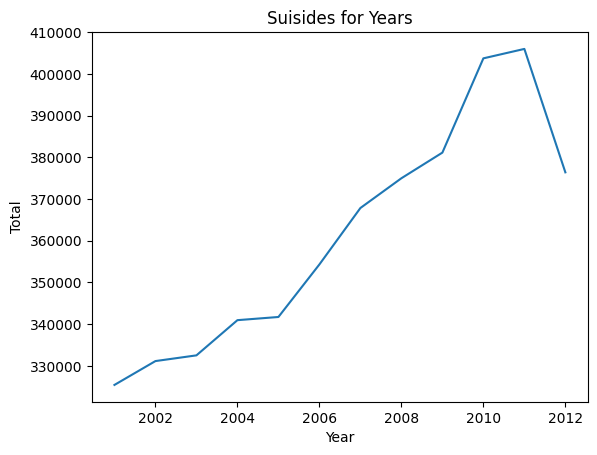

In [141]:
grp = data.groupby(['Year'])['Total'].sum().reset_index()

sns.lineplot(data = grp, x = 'Year', y  = 'Total')
plt.title("Suisides for Years")
plt.show()

**Observation :- Theres continuous rise in rate of suisides year by year but there a dip after 2011**

* Lets see the total males and females suisides for years 

In [142]:
year_suiside = data.groupby(['Year','Gender'])['Total'].sum().reset_index()
year_suiside

,Year,Gender,Total
0,2001,Female,126493
1,2001,Male,198935
2,2002,Female,123165
3,2002,Male,207981
4,2003,Female,121877
5,2003,Male,210639
6,2004,Female,123021
7,2004,Male,217934
8,2005,Female,122992
9,2005,Male,218725


Text(0.5, 1.0, ' Males and Females Suisides for years')

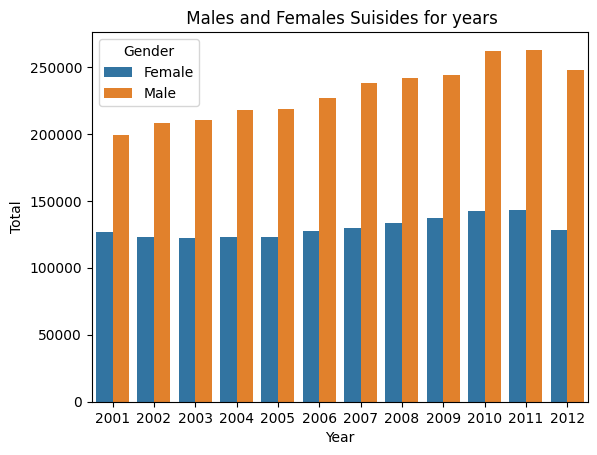

In [143]:
sns.barplot(data = year_suiside , x ='Year', y = 'Total', hue = 'Gender')
plt.title(" Males and Females Suisides for years")

* Lets see for suisides for Unemployed Peoples

In [144]:
unemp_sui = data[data['Type'] == 'Unemployed']
unemp_sui = unemp_sui.sort_values(by = 'Total',ascending=False)
unemp_sui

,State,Year,Type_code,Type,Gender,Age_group,Total
234046,West Bengal,2006,Professional_Profile,Unemployed,Male,15-29,928
234071,West Bengal,2006,Professional_Profile,Unemployed,Male,30-44,639
236898,West Bengal,2011,Professional_Profile,Unemployed,Male,30-44,638
233478,West Bengal,2005,Professional_Profile,Unemployed,Male,15-29,617
207718,Tamil Nadu,2009,Professional_Profile,Unemployed,Male,30-44,617
...,...,...,...,...,...,...,...
21882,Assam,2003,Professional_Profile,Unemployed,Female,60+,1
75916,Gujarat,2003,Professional_Profile,Unemployed,Female,60+,1
190233,Rajasthan,2002,Professional_Profile,Unemployed,Female,45-59,1
214298,Tripura,2007,Professional_Profile,Unemployed,Female,30-44,1


* Top 10 states for unemployes Suisides

In [145]:
top10_unemp_sui_states = unemp_sui.groupby(['State'])['Total'].sum().reset_index().sort_values(by = 'Total', ascending =False).head(10)
top10_unemp_sui_states

,State,Total
29,Tamil Nadu,20770
17,Kerala,13655
33,West Bengal,13181
19,Maharashtra,11389
1,Andhra Pradesh,7504
16,Karnataka,7259
11,Gujarat,6123
24,Odisha,5324
31,Uttar Pradesh,4050
6,Chhattisgarh,3637


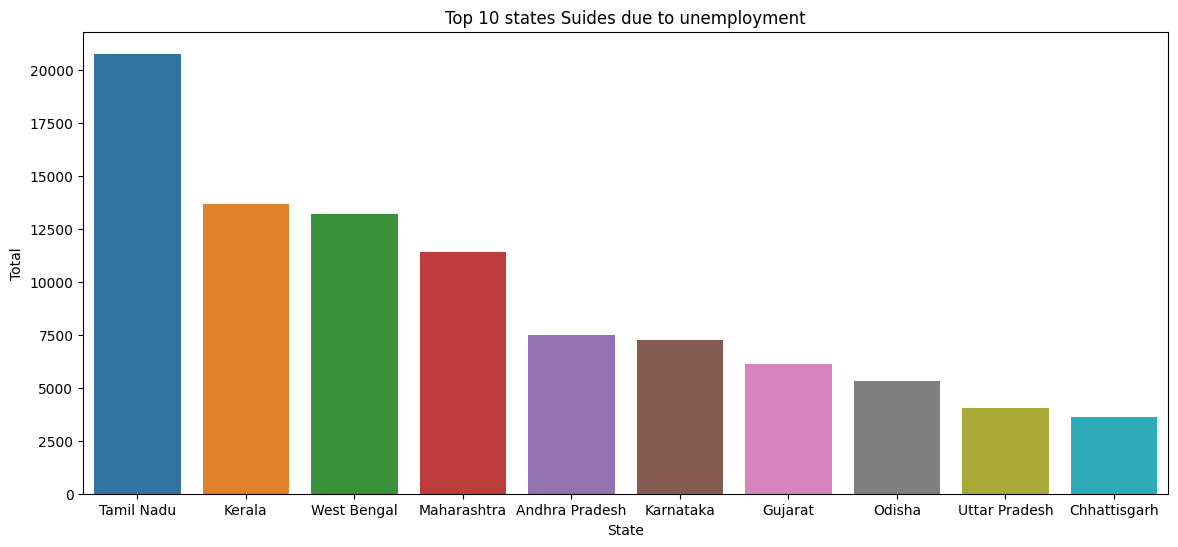

In [146]:
plt.figure(figsize=(14,6))
sns.barplot(data = top10_unemp_sui_states, x = 'State', y = 'Total')
plt.title("Top 10 states Suides due to unemployment")
plt.show()

**Observation :- TamilNadu has most Suisides by unemployment**

In [147]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8


* Lets see Total Males And Female Suisides

In [148]:
gender_suiside = data.groupby(['Gender'])['Total'].sum().reset_index(name  = 'Total Suisides')
gender_suiside

,Gender,Total Suisides
0,Female,1558896
1,Male,2777252


In [149]:
px.pie(data_frame = gender_suiside ,values = 'Total Suisides', names = 'Gender',width = 500, color = ('red','blue'))

**Obervation :- Theres are  28% more Suisides by males Than Females**

In [150]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8


In [151]:
list(data['Type_code'].unique())

['Causes', 'Means_adopted', 'Professional_Profile']

In [152]:
list(age_grp_unkonwn['Type_code'].unique())

['Education_Status', 'Social_Status']

Lets create different dataframes with repect to Type_code

In [153]:
suiside_edustatus = age_grp_unkonwn[age_grp_unkonwn['Type_code']=='Education_Status']
suiside_edustatus

,State,Year,Type_code,Type,Gender,Age_group,Total
261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
266,A & N Islands,2001,Education_Status,Primary,Female,0-100+,7
267,A & N Islands,2001,Education_Status,Matriculate/Secondary,Female,0-100+,6
268,A & N Islands,2001,Education_Status,Matriculate/Secondary,Male,0-100+,10
...,...,...,...,...,...,...,...
237234,West Bengal,2012,Education_Status,Primary,Male,0-100+,2983
237235,West Bengal,2012,Education_Status,No Education,Male,0-100+,1096
237236,West Bengal,2012,Education_Status,Middle,Male,0-100+,2467
237237,West Bengal,2012,Education_Status,Graduate,Male,0-100+,242


In [154]:
suiside_socialstat = age_grp_unkonwn[age_grp_unkonwn['Type_code']=='Social_Status']
suiside_socialstat

,State,Year,Type_code,Type,Gender,Age_group,Total
552,A & N Islands,2001,Social_Status,Married,Female,0-100+,38
556,A & N Islands,2001,Social_Status,Never Married,Female,0-100+,12
559,A & N Islands,2001,Social_Status,Married,Male,0-100+,55
560,A & N Islands,2001,Social_Status,Never Married,Male,0-100+,24
1109,A & N Islands,2002,Social_Status,Never Married,Female,0-100+,17
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [155]:
suiside_means = data[data['Type_code'] =='Means_adopted']
suiside_means

,State,Year,Type_code,Type,Gender,Age_group,Total
277,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
307,A & N Islands,2001,Means_adopted,By Hanging,Male,0-14,2
312,A & N Islands,2001,Means_adopted,By Fire/Self Immolation,Female,15-29,2
315,A & N Islands,2001,Means_adopted,By Consuming Other Poison,Female,15-29,9
316,A & N Islands,2001,Means_adopted,By Hanging,Female,15-29,20
...,...,...,...,...,...,...,...
237393,West Bengal,2012,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,60+,7
237394,West Bengal,2012,Means_adopted,By Consuming Insecticides,Male,60+,53
237395,West Bengal,2012,Means_adopted,By Other means (please specify),Male,60+,241
237396,West Bengal,2012,Means_adopted,By Consuming Other Poison,Male,60+,99


In [156]:
suiside_profile  = data[data['Type_code'] =='Professional_Profile']
suiside_profile

,State,Year,Type_code,Type,Gender,Age_group,Total
443,A & N Islands,2001,Professional_Profile,Student,Female,0-14,2
448,A & N Islands,2001,Professional_Profile,Student,Male,0-14,1
456,A & N Islands,2001,Professional_Profile,Others (Please Specify),Male,0-14,1
461,A & N Islands,2001,Professional_Profile,House Wife,Female,15-29,21
468,A & N Islands,2001,Professional_Profile,Others (Please Specify),Female,15-29,1
...,...,...,...,...,...,...,...
236948,West Bengal,2011,Professional_Profile,Others (Please Specify),Male,60+,354
236949,West Bengal,2011,Professional_Profile,Self-employed (Business activity),Male,60+,32
236950,West Bengal,2011,Professional_Profile,Service (Private),Male,60+,1
236951,West Bengal,2011,Professional_Profile,Others (Please Specify),Male,60+,195


In [157]:
suiside_cause = data[data['Type_code'] =='Causes']
suiside_cause

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...
236650,West Bengal,2011,Causes,Other Prolonged Illness,Male,60+,41
236651,West Bengal,2011,Causes,Fall in Social Reputation,Male,60+,3
236652,West Bengal,2011,Causes,Insanity/Mental Illness,Male,60+,35
236653,West Bengal,2011,Causes,Other Causes (Please Specity),Male,60+,136


* Types of suisides

In [158]:
typeofsuiside = suiside_means.groupby(['Type'])['Total'].sum().reset_index().sort_values(by = 'Total')
typeofsuiside

,Type,Total
9,By Machine,1661
14,By Self Infliction of injury,5093
3,By Fire-Arms,6294
6,By Jumping from (Building),7871
8,By Jumping off Moving Vehicles/Trains,8116
7,By Jumping from (Other sites),8127
10,By Other means,9238
13,By Overdose of sleeping pills,9960
16,By touching electric wires,10816
12,By Over Alcoholism,15973


In [159]:
import plotly.express as px

px.bar(data_frame = typeofsuiside, y = 'Type', x = 'Total',title="suisides by type",height = 600)


**Oservation :- Most number of suisides are by Hanging while by injury or by machine is least**

* causes of suisides

In [160]:
causesofsuiside = suiside_cause.groupby(['Type'])['Total'].sum().reset_index().sort_values(by = 'Total')
causesofsuiside

,Type,Total
17,Not having Children (Barrenness/Impotency,766
12,Ideological Causes/Hero Worshipping,2118
13,Illegitimate Pregnancy,2494
1,Bankruptcy or Sudden change in Economic Status,2655
22,Physical Abuse (Rape/Incest Etc.),3992
6,Divorce,4133
21,Paralysis,7286
18,Not having Children(Barrenness/Impotency,7822
14,Illness (Aids/STD),8723
3,Cancer,9058


In [161]:

px.bar(data_frame = causesofsuiside, y = 'Type', x = 'Total',title="suisides by Causes",height = 700)


**Observation :- The major Cause of suisides are family problems while single peoples(not having childrens) have least rate od suiside**

* suisides by profile

In [162]:
profileofsuiside = suiside_profile.groupby(['Type'])['Total'].sum().reset_index().sort_values(by = 'Total')
profileofsuiside

,Type,Total
5,Retired Person,11334
7,Service (Government),23325
4,Public Sector Undertaking,30786
3,Professional Activity,39204
9,Student,74323
6,Self-employed (Business activity),78112
10,Unemployed,114374
8,Service (Private),115472
0,Farming/Agriculture Activity,197923
1,House Wife,285243


In [163]:

px.bar(data_frame = profileofsuiside, y = 'Type', x = 'Total',title="suisides by Profile",height = 600)

**Observation :- Housewives have most num of suisides while servies peoples have least**

* suisides by education status

In [164]:
edustatofsuiside = suiside_edustatus.groupby(['Type'])['Total'].sum().reset_index().sort_values(by = 'Total')
edustatofsuiside

,Type,Total
6,Post Graduate and Above,7475
0,Diploma,14153
1,Graduate,31274
2,Hr. Secondary/Intermediate/Pre-Universit,118908
3,Matriculate/Secondary,256566
5,No Education,321757
4,Middle,342971
7,Primary,362827


In [165]:
px.bar(data_frame=edustatofsuiside, x = 'Total', y = 'Type', title= "Suisides by education Status")

**Observation :-  Here we see Highly educated peoples having least suisides while least educated have most suisides**

* Suisides by social status

In [166]:
socialstatofsuiside = suiside_socialstat.groupby(['Type'])['Total'].sum().reset_index().sort_values(by ='Total')
socialstatofsuiside

,Type,Total
0,Divorcee,15272
3,Seperated,38471
4,Widowed/Widower,62113
2,Never Married,318301
1,Married,1021774


In [167]:
px.bar(data_frame=socialstatofsuiside, y = 'Type', x = 'Total', title ="Suisides by Social status")

**Observation :- Here we see most suisides are by Married peoples and least by Divorcee**

## Thank You